# FetchMaker

Congratulations! You have just started working at the hottest new tech startup, FetchMaker. FetchMaker's mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it is your job to analyze some of that data.

In [1]:
import numpy as np
import pandas as pd

# Import data
dogs = pd.read_csv('dog_data.csv')

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

## Data to the Rescue

1. FetchMaker has provided us with data for a sample of dogs from their app, including the following attributes:

    * `weight`, an integer representing how heavy a dog is in pounds
    * `tail_length`, a float representing tail length in inches
    * `age`, in years
    * `color`, a String such as `"brown"` or `"grey"`
    * `is_rescue`, a boolean `0` or `1`

    The data has been saved for you as a pandas DataFrame named `dogs`. Use the `.head()` method to inspect the first five rows of the dataset.

In [2]:
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


2. FetchMaker estimates (based on historical data for all dogs) that `8%` of dogs in their system are rescues.

    They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

    Store the `is_rescue` values for `'whippet'`s in a variable called `whippet_rescue`.

In [3]:
whippet_rescue = dogs.is_rescue[dogs.breed == 'whippet']

3. How many whippets are rescues (remember that the value of `is_rescue` is `1` for rescues and `0` otherwise)? Save this number as `num_whippet_rescues` and print it out.

In [4]:
num_whippet_rescues = np.count_nonzero(whippet_rescue)
num_whippet_rescues

6

4. How many whippets are in this sample of data in total? Save this number as `num_whippets` and print it out.

In [5]:
num_whippets = len(whippet_rescue)
num_whippets

100

5. Use a hypothesis test to test the following null and alternative hypotheses:

    * Null: 8% of whippets are rescues
    * Alternative: more or less than 8% of whippets are rescues

    Save the p-value from this test as `pval` and print it out. Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?

In [6]:
from scipy.stats import binom_test

expected_percentage = 0.08
significance_threshold = 0.05

pval = binom_test(num_whippet_rescues, n=num_whippets, p=expected_percentage)
print(f'With a p-value of {pval:0.2e} the significance is {pval < significance_threshold}')

With a p-value of 5.81e-01 the significance is False


### Conclusion

We conclude that the null hypothesis has to be rejected. Therefore more or less than 8% of whippets are rescues. (We cannot draw any meaningful conclusion)

## Mid-Sized Dog Weights

6. Three of FetchMaker's most popular mid-sized dog breeds are `'whippet'`s, `'terrier'`s, and `'pitbull'`s. Is there a significant difference in the average weights of these three dog breeds?

To start answering this question, save the weights of each of these breeds in three separate series named `wt_whippets`, `wt_terriers`, and `wt_pitbulls`, respectively.

In [7]:
wt_whippets = dogs.weight[dogs.breed == 'whippet']
wt_terriers = dogs.weight[dogs.breed == 'terrier']
wt_pitbulls = dogs.weight[dogs.breed == 'pitbull']

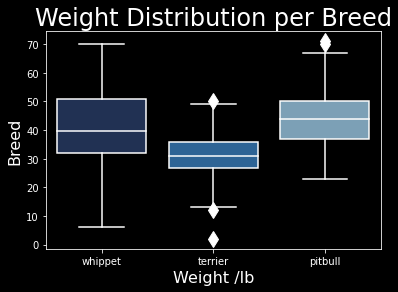

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'},
    'flierprops': {
                    'markerfacecolor':'white',
                    'markeredgecolor': 'white',
                    'markersize': 12
                }
}

EXOTIC_ORCHIDS_COLOR_SCHEME = {
    'dark_blue': '#192E5B',
    'medium_blue': '#1D65A6',
    'light_blue': '#72A2C0',
    'green': '#00743F',
    'yellow': '#F2A104'   
}

my_pal = {
    "whippet": EXOTIC_ORCHIDS_COLOR_SCHEME['dark_blue'],
    "terrier": EXOTIC_ORCHIDS_COLOR_SCHEME['medium_blue'],
    "pitbull": EXOTIC_ORCHIDS_COLOR_SCHEME['light_blue']
}

plt.style.use('dark_background')

sns.boxplot(
    x=dogs_wtp.breed,
    y=dogs_wtp.weight,
    palette=my_pal,    
    order = [
        'whippet',
        'terrier',
        'pitbull'
        ],
    **PROPS)
plt.xlabel("Weight /lb", size=16)
plt.ylabel("Breed", size=16)
plt.title("Weight Distribution per Breed", size=24)
plt.show()

7. Run a single hypothesis test to address the following null and alternative hypotheses:

    * Null: whippets, terriers, and pitbulls all weigh the same amount on average
    * Alternative: whippets, terriers, and pitbulls **do not** all weigh the same amount on average (at least one pair of breeds has differing average weights)

    Save the resulting p-value as `pval` and print it out. Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [9]:
from scipy.stats import f_oneway

weight_comparison = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)

weight_comparison.pvalue

3.276415588274815e-17

### Conclusion

Since our p-value is smaller than our threshold we can conclude that there is a significant difference for at least one of the breeds.

8. If you completed the previous step correctly, you should have concluded that at least one pair of dog breeds have significantly different average weights.

    Run another hypothesis test to determine which of those breeds (whippets, terriers, and pitbulls) weigh different amounts on average. Use an overall type I error rate of 0.05 for all three comparisons. Note that we have already provided you with code in cell to subset the data to just these breeds and have saved this subset as `dogs_wtp` using the following code:

    ```
    dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]
    ```

    This should make it easier for you to run the test you need!

    Print out the results. Which pairs of dog breeds weigh different amounts?

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = pairwise_tukeyhsd(endog=dogs_wtp.weight, groups=dogs_wtp.breed)
print(results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------


### Conclusion

We conclude that the difference in weight between `pitbull` and `terrier` as well as between `terrier` and `whippet` is significant.

## Poodle and Shihtzu Colors

9. FetchMaker wants to know if `'poodle'`s and `'shihtzu'`s come in different colors. Note that we have already provided you with code in cell 2 to subset the data to just these breeds and have saved this subset as `dogs_ps` using the following code:

    ```
    dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]
    ```

    This should make it easier for you to investigate this question!

    To start, use the subsetted data to create a contingency table of dog colors by breed (poodle vs. shihtzu). Save the table as `xtab` and print it out.

In [11]:
xtab = pd.crosstab(dogs_ps.breed, dogs_ps.color)
xtab

color,black,brown,gold,grey,white
breed,,,,,
poodle,17,13,8,52,10
shihtzu,10,36,6,41,7


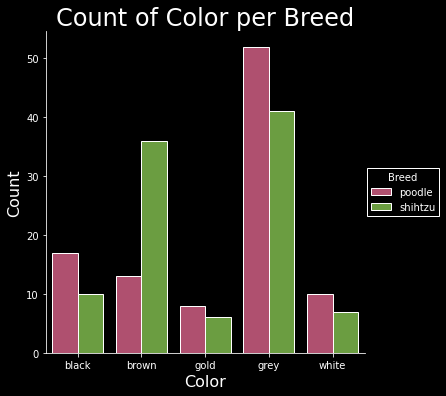

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'},
    'flierprops': {
                    'markerfacecolor':'white',
                    'markeredgecolor': 'white',
                    'markersize': 12
                }
}

COMPLEMENTARY_COLORS = {
    'Pink': '#BF406A',
    'Green': '#6AAC32'
}

my_pal = {
    "poodle": COMPLEMENTARY_COLORS['Pink'],
    "shihtzu": COMPLEMENTARY_COLORS['Green']
}

plt.style.use('dark_background')

sns.catplot(
    kind='count',
    x='color',
    hue='breed',
    data=dogs_ps,
    palette=my_pal,
    edgecolor='white',
    legend=False
)
plt.xlabel("Color", size=16)
plt.ylabel("Count", size=16)
plt.title("Count of Color per Breed", size=24)
legend = plt.legend(title="Breed", fancybox=False, loc="center right", bbox_to_anchor=(1.25, 0.5))
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')
frame.set_alpha(1) 
plt.show()

10. Run a hypothesis test for the following null and alternative hypotheses:

    * Null: There is an association between breed (poodle vs. shihtzu) and color.
    * Alternative: There is not an association between breed (poodle vs. shihtzu) and color.

    Save the p-value as `pval` and print it out. Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.

In [13]:
from scipy.stats import chi2_contingency

_, pval, _, _ = chi2_contingency(xtab)
pval

0.005302408293244597

### Conclusion

Sine our p-value is smaller than our threshold, we can conclude that there is significant difference between poodle colors and shihzu colors.

11. Great job!

    Feel free to play around with the FetchMaker data some more and run some hypothesis tests of your own.

    The breeds you can explore are `"poodle"`, `"rottweiler"`, `"whippet"`, `"greyhound"`, `"terrier"`, `"chihuahua"`, `"shihtzu"`, and `"pitbull"`.

    **Extra challenge:** Remind yourself of your **data visualization** skills and your ability to describe the **central tendency** of the data. For example, a boxplot visualization can add a lot to your understanding of an ANOVA result.